## Load Data

In [1]:
import pandas as pd

In [2]:
all_reviews = pd.read_csv('Hotel_Reviews.csv')
all_reviews.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
all_reviews_sample = all_reviews.sample(frac=0.05, replace=False, random_state=1)

In [4]:
all_reviews_sample['Review_Polarity'] = all_reviews_sample['Reviewer_Score'].apply(lambda x: 1 if x >= 5 else 0)
review_content = all_reviews_sample[['Positive_Review', 'Negative_Review', 'Reviewer_Score', 'Review_Polarity']]
review_content.head(5)

,Positive_Review,Negative_Review,Reviewer_Score,Review_Polarity
356054,Nothing was too much trouble The staff were a...,No Negative,10.0,1
395957,I loved there shower It felt like you were un...,I had a Junior suite The bed was only a queen...,10.0,1
468352,beds really comfy and the location is great a...,staff could be less rude the pool area is hor...,6.7,1
281462,Really nice hotel good facilities great staff...,No Negative,9.6,1
498978,Everything is super And room and design Very ...,No Negative,10.0,1


In [5]:
review_content.shape

(25787, 4)

## Clean and Preprocess Data

In [6]:
review_content['Positive_Review'] = review_content['Positive_Review'].apply(lambda review: review.replace('No Positive', ''))
review_content['Negative_Review'] = review_content['Negative_Review'].apply(lambda review: review.replace('No Negative', ''))
review_content.head(5)

/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Positive_Review,Negative_Review,Reviewer_Score,Review_Polarity
356054,Nothing was too much trouble The staff were a...,,10.0,1
395957,I loved there shower It felt like you were un...,I had a Junior suite The bed was only a queen...,10.0,1
468352,beds really comfy and the location is great a...,staff could be less rude the pool area is hor...,6.7,1
281462,Really nice hotel good facilities great staff...,,9.6,1
498978,Everything is super And room and design Very ...,,10.0,1


In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shannywu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
import string
from nltk import pos_tag as pos_tagger
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [9]:
def get_lower_text(text):
    return text.lower()

def tokenize_text(text):
    return text.strip().split(' ')

def remove_stop_words(text):
    stop_words = stopwords.words('english')
    return [word for word in text if word not in stop_words]

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_token(text_with_pos):
    return [WordNetLemmatizer().lemmatize(token[0], get_wordnet_pos(token[1])) for token in text_with_pos]

In [46]:
def clean_text(text):
    if not isinstance(text, str):
        return []

    text = get_lower_text(text)
    text = tokenize_text(text)
    text = remove_stop_words(text)
    text = [token for token in text if len(token) > 0]
    pos_tags = pos_tagger(text)    
    text = lemmatize_token(pos_tags)

    return text

In [11]:
review_content['Positive_Review'].head(5)

356054     Nothing was too much trouble The staff were a...
395957     I loved there shower It felt like you were un...
468352     beds really comfy and the location is great a...
281462     Really nice hotel good facilities great staff...
498978     Everything is super And room and design Very ...
Name: Positive_Review, dtype: object

In [12]:
review_content['Positive_Review_Clean'] = review_content['Positive_Review'].apply(lambda x: clean_text(x))
review_content['Negative_Review_Clean'] = review_content['Negative_Review'].apply(lambda x: clean_text(x))

review_content.head(5)

/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Positive_Review,Negative_Review,Reviewer_Score,Review_Polarity,Positive_Review_Clean,Negative_Review_Clean
356054,Nothing was too much trouble The staff were a...,,10.0,1,"[nothing, much, trouble, staff, attentive, tim...",[]
395957,I loved there shower It felt like you were un...,I had a Junior suite The bed was only a queen...,10.0,1,"[love, shower, felt, like, fire, hose, great, ...","[junior, suite, bed, queen, size, brother, get..."
468352,beds really comfy and the location is great a...,staff could be less rude the pool area is hor...,6.7,1,"[bed, really, comfy, location, great, also, ma...","[staff, could, less, rude, pool, area, horrible]"
281462,Really nice hotel good facilities great staff...,,9.6,1,"[really, nice, hotel, good, facility, great, s...",[]
498978,Everything is super And room and design Very ...,,10.0,1,"[everything, super, room, design, clean, super]",[]


In [13]:
review_content.shape

(25787, 6)

## Features

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

1. most commom ngrams
2. most common ngrams with specific words e.g., location, transportation, service, and staff.

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
def get_review_text_list(review_key):
    review_text_list = list(review_content[review_key])
    review_text_list = list(filter(lambda review: len(review) > 1, review_text_list))

    return review_text_list

In [17]:
neg_review_text_list = get_review_text_list('Negative_Review_Clean')
pos_review_text_list = get_review_text_list('Positive_Review_Clean')

In [18]:
len(pos_review_text_list)

22473

In [52]:
def get_ngram_with_specific_word(vocabs, specific_word):
    words = {}
    for ngram, count in vocabs.items():
        if specific_word in ngram:
            words[ngram] = count

    return words

In [53]:
def get_top_n_ngrams(review_text_list, ngram=2, top_n=10, specific_word=None):
    joined_text = list(map(lambda x: ' '.join(x), review_text_list))
    counter = CountVectorizer(
        analyzer = 'word',
        ngram_range=(ngram, ngram))
    ngrams = counter.fit_transform(joined_text)
    vocabs = counter.vocabulary_
    counts = ngrams.toarray().sum(axis=0)
    
    if specific_word:
        words = get_ngram_with_specific_word(vocabs, specific_word)
    else:
        words = vocabs

    top_n_ngrams = [(ngram, counts[i]) for ngram, i in words.items()]
    top_n_ngrams = sorted(top_n_ngrams, key=lambda x: x[1], reverse=True)[:top_n]
    
    return top_n_ngrams

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
def generate_word_cloud(top_n_ngram_list):
    text = ''
    for ngram, cnt in top_n_ngram_list:
        text += ngram + ' '
    wordcloud = WordCloud(background_color='white').generate(text)
    
    return wordcloud

In [23]:
neg_top_10_bigram_location = get_top_n_ngrams(neg_review_text_list, specific_word='location')
neg_top_10_bigram_location

[('location hotel', 26),
 ('location far', 25),
 ('location bit', 25),
 ('location good', 23),
 ('good location', 20),
 ('location little', 18),
 ('hotel location', 18),
 ('great location', 16),
 ('location great', 15),
 ('due location', 11)]

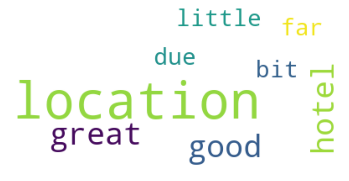

In [24]:
neg_wordcloud_location = generate_word_cloud(neg_top_10_bigram_location)
plt.imshow(neg_wordcloud_location)
plt.axis("off")
plt.show()

In [25]:
pos_top_10_bigram_location = get_top_n_ngrams(pos_review_text_list, specific_word='location')
pos_top_10_bigram_location

[('great location', 1456),
 ('good location', 1028),
 ('excellent location', 589),
 ('location great', 535),
 ('location good', 497),
 ('location excellent', 341),
 ('location perfect', 338),
 ('location staff', 318),
 ('perfect location', 309),
 ('location close', 293)]

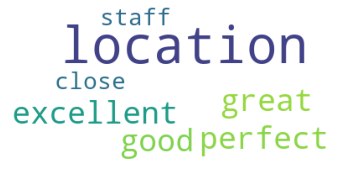

In [26]:
pos_wordcloud_location = generate_word_cloud(pos_top_10_bigram_location)
plt.imshow(pos_wordcloud_location)
plt.axis("off")
plt.show()

In [28]:
from collections import defaultdict

In [63]:
def get_coexist_words(ngrams, specific_word, pos_tag):
    result = defaultdict(int)
    for ngram, cnt in ngrams:
        ngram = ngram.split(' ')
        ngram_with_pos_tag = pos_tagger(ngram)
        for word, pos in ngram_with_pos_tag:
            if word != specific_word and pos == pos_tag:
                result[word] += cnt
                continue
    return result

In [49]:
sw = 'location'
get_coexist_words(pos_top_10_bigram_location, sw, 'JJ')

defaultdict(int,
            {'great': 1991, 'good': 1028, 'excellent': 589, 'perfect': 309})

In [50]:
get_coexist_words(neg_top_10_bigram_location, sw, 'JJ')

defaultdict(int, {'good': 20, 'little': 18, 'great': 31, 'due': 11})

In [54]:
pos_top_10_bigram_great = get_top_n_ngrams(pos_review_text_list, specific_word='great')
pos_top_10_bigram_great

[('great location', 1456),
 ('location great', 535),
 ('staff great', 387),
 ('great staff', 270),
 ('room great', 269),
 ('hotel great', 268),
 ('great breakfast', 229),
 ('great hotel', 195),
 ('great room', 169),
 ('breakfast great', 165)]

In [55]:
get_coexist_words(pos_top_10_bigram_great, 'great', 'NN')

defaultdict(int,
            {'location': 1991,
             'staff': 657,
             'room': 438,
             'hotel': 463,
             'breakfast': 394})

In [61]:
neg_top_10_bigram = get_top_n_ngrams(neg_review_text_list, specific_word='awful')
neg_top_10_bigram

[('room awful', 14),
 ('breakfast awful', 7),
 ('pillow awful', 5),
 ('bed awful', 4),
 ('awful room', 4),
 ('smell awful', 3),
 ('shower awful', 3),
 ('awful breakfast', 3),
 ('awful small', 3),
 ('awful coffee', 3)]

In [62]:
get_coexist_words(neg_top_10_bigram, 'awful', 'NN')

defaultdict(int,
            {'room': 18,
             'breakfast': 10,
             'pillow': 5,
             'bed': 4,
             'smell': 3,
             'shower': 3,
             'coffee': 3})